<a href="https://colab.research.google.com/github/imansrf/disaster_area_identification/blob/main/Identification_Disaster__Area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impor Dataset

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Membuat Folder

In [40]:
import shutil
import os, sys

## create folders
if not os.path.exists('data/'):
    os.makedirs('data/data_disaster')
    os.makedirs('data/train_images/pre_images')
    os.makedirs('data/train_images/post_images')
    os.makedirs('data/train_images/pre_buildings')
    os.makedirs('data/train_images/post_buildings')
    os.makedirs('data/train_labels/pre_labels')
    os.makedirs('data/train_labels/post_labels')

# Compress Citra ke 24 bit

In [57]:
import glob
from PIL import Image

src ='/content/gdrive/My Drive/Data disaster/train/images/'
dest= '/content/data'

for filename in os.listdir(src):
        im = Image.open(src + filename).convert('RGB')
        print (im.mode)
        im.save(dest + filename)

RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB
RGB


In [65]:
import json
import pandas as pd
from pandas.io.json import json_normalize

source ='/content/data/'
dest = '/content/data/train_images/pre_images/'
pre_tsunami_images = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'pre' in f])
for f in pre_tsunami_images:
    shutil.copy(source + f, dest)

In [67]:
source ='/content/data/'
dest = '/content/data/train_images/post_images/'
post_tsunami_images = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'post' in f])
for f in post_tsunami_images:
    shutil.copy(source + f, dest)

In [70]:
import json
import pandas as pd
from pandas.io.json import json_normalize

source ='/content/gdrive/My Drive/Data disaster/train/labels/'
dest = '/content/data/train_labels/pre_labels/'

pre_tsunami_labels = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'pre' in f])
for f in pre_tsunami_labels:
    shutil.copy(source + f, dest)

In [71]:
source ='/content/gdrive/My Drive/Data disaster/train/labels/'
dest = '/content/data/train_labels/post_labels/'

post_tsunami_labels = sorted([f for f in os.listdir(source) if 'tsunami' in f and 'post' in f])
for f in post_tsunami_labels:
    shutil.copy(source + f, dest)

# Data Exploration

In [83]:
import pandas as pd

ROOT_PATH = ''

In [84]:
import json
from pandas.io.json import json_normalize

with open (ROOT_PATH + '/content/data/train_labels/post_labels/palu-tsunami_00000000_post_disaster.json') as f:
    data = json.load(f)

# convert buildings json data into pandas dataframe:
buildings_raw = data['features']['xy']
buildings_df = pd.DataFrame.from_dict(json_normalize(buildings_raw), orient='columns')
buildings_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((1023.999983805823 922.3085313916253,...",building,no-damage,0f543926-03dd-4e43-a799-a5340df7ac3f
1,"POLYGON ((966.260237953758 930.3518448985415, ...",building,no-damage,a43dafed-fa80-4adb-8648-53402b89f70c
2,"POLYGON ((1011.379567681141 982.5919373348984,...",building,no-damage,8392d8bf-2d3f-4e36-8d9e-b52fe5c39065
3,"POLYGON ((1016.437348534804 1022.960518981353,...",building,no-damage,e570178c-6dfa-4e69-ac51-60b60bf57df9
4,"POLYGON ((932.7427087921078 1022.96048937727, ...",building,no-damage,b9928927-640e-4773-91b5-cc4cc4f090fb
...,...,...,...,...
86,"POLYGON ((366.9222809396553 82.83110890198647,...",building,no-damage,f8b6c0e7-5912-45e5-a9ee-22d8d032c21e
87,"POLYGON ((358.2961580661523 69.15075146146614,...",building,no-damage,8fc40a64-80b4-476e-ab01-d9233ae047db
88,"POLYGON ((376.0323433800527 37.77546626124154,...",building,no-damage,7d486b70-3d7c-43b7-9681-addf02c1474c
89,"POLYGON ((361.7431814756954 16.12379466286736,...",building,no-damage,231cacdb-7d4b-4a36-88d5-d314c1b72bb3


In [85]:
# for a single image
buildings_df['properties.subtype'].value_counts()

no-damage       81
destroyed        9
major-damage     1
Name: properties.subtype, dtype: int64

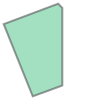

In [91]:
from shapely.geometry import Polygon
import shapely.wkt

P = shapely.wkt.loads(data['features']['xy'][0]['wkt'])
P

In [92]:
P.bounds

(1003.190390282233, 918.4690759638635, 1023.999983806291, 951.35086251577)

In [99]:
# get all files for post disaster
directory = ROOT_PATH + '/content/data/train_labels/post_labels/'
pattern = 'post'

post_disaster_files = [f for f in os.listdir(directory) if pattern in f]

In [100]:
# loop over post disaster data
all_json_data = []
for file in post_disaster_files:
    with open(directory + file) as f:
        data = json.load(f)
        all_json_data.append(data)

In [101]:
df = pd.DataFrame()
for curr_data in all_json_data:
    curr_building_raw = curr_data['features']['xy']
    df = df.append(json_normalize(curr_building_raw))
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((196.7049833400386 981.6097748864555,...",building,no-damage,68e87da3-5c77-4b3f-936c-733f638bc90a
1,"POLYGON ((247.0325789669919 1015.431930937346,...",building,destroyed,e58dd0c3-7446-4b4a-810d-5a3cd8a1140d
2,"POLYGON ((91.3630687188176 1022.95928360546, 8...",building,no-damage,3c6cf473-90e3-46b0-afde-4e4730ae9036
3,"POLYGON ((158.4988222195684 1000.259214580388,...",building,destroyed,a237e4de-91a2-4f20-8e02-749d62a9d7c7
4,"POLYGON ((90.39905115356629 988.6641698173281,...",building,no-damage,bedf52c2-1479-42f7-88ff-fd4620455720
...,...,...,...,...
16,"POLYGON ((919.0941006669251 214.4276037420169,...",building,un-classified,20dd0bcd-7d29-4b85-8afb-e1ad13fb976e
17,"POLYGON ((966.2273198049054 232.6324979091888,...",building,destroyed,805c7fbf-67ce-47e5-aaf3-7fff97fe106b
18,"POLYGON ((950.2022454962465 234.7999999149826,...",building,destroyed,15a9ad76-a336-41cf-a133-57310d57cf0d
19,"POLYGON ((970.7694584857015 215.2795714476817,...",building,major-damage,1043f996-fe3e-435b-8d92-cf75bb45c090


In [104]:
### Building damages for hurricanes
post_disaster_tsunami_files = [f for f in os.listdir(directory) if 'tsunami' in f]
post_disaster_tsunami_files = list(filter(lambda x: 'post' in x, post_disaster_tsunami_files))

In [106]:
tsunami_json_data = []
for file in post_disaster_tsunami_files:
    with open(directory + file) as f:
        data = json.load(f)
        tsunami_json_data.append(data)

In [107]:
df_tsunami = pd.DataFrame()
for curr_tsunami_data in tsunami_json_data:
    df_tsunami = df_tsunami.append(json_normalize(curr_tsunami_data['features']['xy']))
df_tsunami

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,wkt,properties.feature_type,properties.subtype,properties.uid
0,"POLYGON ((196.7049833400386 981.6097748864555,...",building,no-damage,68e87da3-5c77-4b3f-936c-733f638bc90a
1,"POLYGON ((247.0325789669919 1015.431930937346,...",building,destroyed,e58dd0c3-7446-4b4a-810d-5a3cd8a1140d
2,"POLYGON ((91.3630687188176 1022.95928360546, 8...",building,no-damage,3c6cf473-90e3-46b0-afde-4e4730ae9036
3,"POLYGON ((158.4988222195684 1000.259214580388,...",building,destroyed,a237e4de-91a2-4f20-8e02-749d62a9d7c7
4,"POLYGON ((90.39905115356629 988.6641698173281,...",building,no-damage,bedf52c2-1479-42f7-88ff-fd4620455720
...,...,...,...,...
16,"POLYGON ((919.0941006669251 214.4276037420169,...",building,un-classified,20dd0bcd-7d29-4b85-8afb-e1ad13fb976e
17,"POLYGON ((966.2273198049054 232.6324979091888,...",building,destroyed,805c7fbf-67ce-47e5-aaf3-7fff97fe106b
18,"POLYGON ((950.2022454962465 234.7999999149826,...",building,destroyed,15a9ad76-a336-41cf-a133-57310d57cf0d
19,"POLYGON ((970.7694584857015 215.2795714476817,...",building,major-damage,1043f996-fe3e-435b-8d92-cf75bb45c090


In [108]:
# for hurricane buildings:
df_tsunami['properties.subtype'].value_counts()

no-damage        25455
destroyed         4966
major-damage       571
un-classified      401
minor-damage         1
Name: properties.subtype, dtype: int64

In [109]:
from shapely.geometry import Polygon

polygon_data = []
for image_meta in tsunami_json_data:
    for building in image_meta['features']['xy']:
        polygon_data.append((building['wkt'], building['properties']['subtype']))

polygon_bounds = []
for polygon in polygon_data:
    shapely_obj = shapely.wkt.loads(polygon[0])
    poly_bound = shapely_obj.bounds
    polygon_bounds.append((poly_bound[2]-poly_bound[0], poly_bound[3]-poly_bound[1]))

#P = shapely.wkt.loads(tsunami_json_data['features']['xy'][0]['wkt'])

In [111]:
polygon_widths = [polygon[0] for polygon in polygon_bounds]
polygon_y = [polygon[1] for polygon in polygon_bounds]

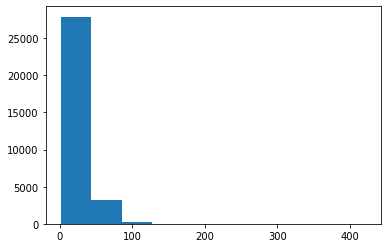

67.05647510955342

In [112]:
import matplotlib.pyplot as plt
import math
import numpy as np

poly_x_log = [math.log(polygon) for polygon in polygon_widths]
# plt.hist(poly_x_log)
plt.hist(polygon_widths)
plt.show()

#find 98 percentile
np_p_widths = np.array(polygon_widths)
crop_lim = np.percentile(np_p_widths, 98)
crop_lim #calculates the 98 percentile

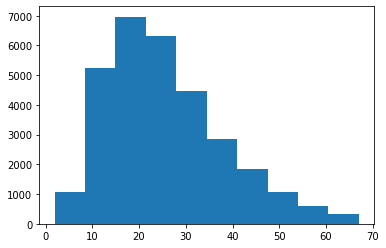

In [113]:
cropped_widths = [x for x in polygon_widths if x <= crop_lim]
plt.hist(cropped_widths)
plt.show()

In [114]:
print(len(polygon_widths))
print(len(cropped_widths))

31394
30766


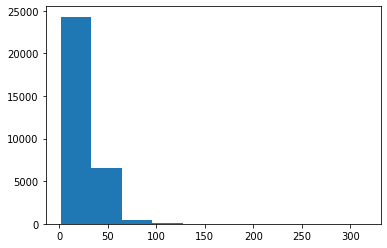

In [115]:
plt.hist(polygon_y)
plt.show()

In [118]:
cropped_y = [y for y in polygon_y if y <= 75]
print(len(polygon_y))
print(len(cropped_y))

31394
31113


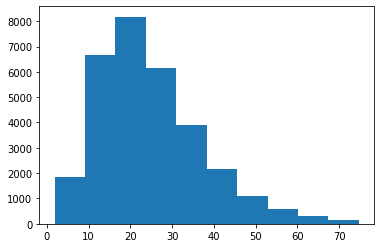

In [119]:
plt.hist(cropped_y)
plt.show()

In [120]:
# for all buildings:
df['properties.subtype'].value_counts()

no-damage        25455
destroyed         4966
major-damage       571
un-classified      401
minor-damage         1
Name: properties.subtype, dtype: int64

# Membuat Building Polygons


In [121]:
from PIL import Image, ImageDraw
import numpy
import shutil
import os
import json
from shapely.geometry import Polygon
import shapely.wkt

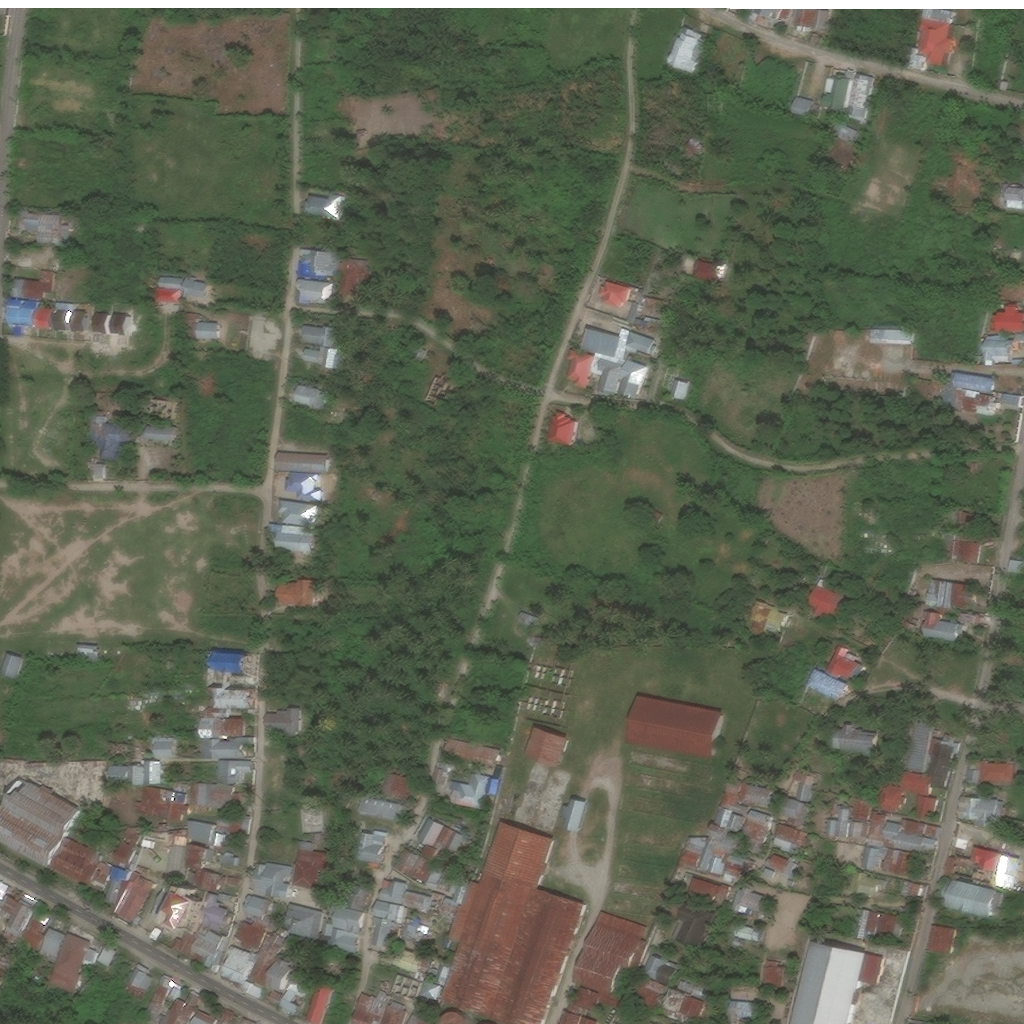

In [135]:
image_source = 'data/train_images/pre_images/'
dest = 'data/train_images/pre_buildings/'

pre_tsunami_images = sorted([f for f in os.listdir(image_source)])

source = 'data/train_images/pre_images/train_imagespalu-tsunami_00000005_pre_disaster.png'

image = Image.open(source).convert("RGBA")
image

In [136]:
def getBuildingImage(image, poly_xy, building_poly):
    imArray = numpy.asarray(image)
    
    # create mask
    maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
    ImageDraw.Draw(maskIm).polygon(poly_xy, outline=1, fill=1)
    mask = numpy.array(maskIm)
    
    # assemble new image (uint8: 0-255)
    newImArray = numpy.empty(imArray.shape,dtype='uint8')

    # colors (three first columns, RGB)
    newImArray[:,:,:3] = imArray[:,:,:3]

    # transparency (4th column)
    newImArray[:,:,3] = mask*255

    # back to Image from numpy
    newIm = Image.fromarray(newImArray, "RGBA")
    
    #crop out just the building from image
    poly_bounds = building_poly.bounds
    cropped_building_img = newIm.crop(poly_bounds)
    
    #put center of cropped image onto standarized image size
    img_w, img_h = cropped_building_img.size
    background = Image.new('RGBA', (50, 50), (255, 255, 255, 0))
    bg_w, bg_h = background.size
    offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
    background.paste(cropped_building_img, offset)
    return background

In [137]:
## get json data for this file
json_source = 'data/train_labels/pre_labels/'
pre_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

## cuts out building polygons from each image, standardrizes format, and saves images to data folder
#len(pre_tsunami_images)
for image_index in range(len(pre_tsunami_images)):
    image = Image.open(image_source + pre_tsunami_images[image_index]).convert("RGBA")
    with open (json_source + pre_tsunami_jsons[image_index]) as f:
        json_data = json.load(f)
    building_counter = 0
    for building in json_data['features']['xy']:
        building_wkt = building['wkt']
        building_poly = shapely.wkt.loads(building_wkt)
        x, y = building_poly.exterior.coords.xy
        poly_xy = [(x[i], y[i]) for i in range(len(x))]
        formatted_building_image = getBuildingImage(image, poly_xy, building_poly)
        
        building_number = str(building_counter)
        #formatting 
        while len(building_number) < 5:
            building_number = '0' + building_number
            
        formatted_building_image.save(dest + pre_tsunami_images[image_index].replace('.png', '') + '_building_' + building_number + '.png')
        building_counter += 1

In [139]:
## same thing for post images
image_source = 'data/train_images/post_images/'
dest = 'data/train_images/post_buildings/'

post_tsunami_images = sorted([f for f in os.listdir(image_source)])

## get json data for this file
json_source = 'data/train_labels/post_labels/'
post_tsunami_jsons = sorted([f for f in os.listdir(json_source)])

## cuts out building polygons from each image, standardrizes format, and saves images to data folder
#len(pre_hurricane_images)
len(post_tsunami_images)
for image_index in range(len(post_tsunami_images)):
    image = Image.open(image_source + post_tsunami_images[image_index]).convert("RGBA")
    with open (json_source + post_tsunami_jsons[image_index]) as f:
        json_data = json.load(f)
    building_counter = 0
    for building in json_data['features']['xy']:
        building_wkt = building['wkt']
        building_poly = shapely.wkt.loads(building_wkt)
        x, y = building_poly.exterior.coords.xy
        poly_xy = [(x[i], y[i]) for i in range(len(x))]
        formatted_building_image = getBuildingImage(image, poly_xy, building_poly)
        building_number = str(building_counter)
        
        #formatting 
        while len(building_number) < 5:
            building_number = '0' + building_number
        
        formatted_building_image.save(dest + post_tsunami_images[image_index].replace('.png', '') + '_building_' + building_number + '.png')
        building_counter += 1

OSError: ignored